## Installing and importing relevant libraries

In [18]:
!pip install geopandas wget mapclassify descartes

In [19]:
import geopandas as gpd
import wget
from zipfile import ZipFile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
#we download a dataset on education in European coountries between 2012 and 2018 from Eurostat 
url = "https://ltat02022.s3.eu-north-1.amazonaws.com/Eurostat-education-shapefile.zip"
data_filename = 'Eurostat_data_education.zip'
wget.download(url, data_filename)
with ZipFile(data_filename, 'r') as zipObj:
    zipObj.extractall()

100% [..........................................................................] 1222362 / 1222362

In [21]:
dataedu = pd.read_csv("Eurostat_data_education.csv")

In [22]:
#have a look at what this dataset looks like
dataedu.head()

,Unnamed: 0,TIME,GEO,UNIT,ISCED11,ISCEDF13,ISCEDF13_LABEL,SEX,SEX_LABEL,Value,Flag and Footnotes
0,0,2012,Belgium,Percentage,Bachelor's or equivalent level,TOTAL,Total,T,Total,NaN,NaN
1,1,2012,Belgium,Percentage,Bachelor's or equivalent level,F00,Generic programmes and qualifications,T,Total,NaN,NaN
2,2,2012,Belgium,Percentage,Bachelor's or equivalent level,F000,Generic programmes and qualifications not furt...,T,Total,NaN,NaN
3,3,2012,Belgium,Percentage,Bachelor's or equivalent level,F001,Basic programmes and qualifications,T,Total,NaN,NaN
4,4,2012,Belgium,Percentage,Bachelor's or equivalent level,F002,Literacy and numeracy,T,Total,NaN,NaN


In [23]:
dataedu['ISCEDF13_LABEL'].unique().tolist()

['Total',
 'Generic programmes and qualifications',
 'Generic programmes and qualifications not further defined',
 'Basic programmes and qualifications',
 'Literacy and numeracy',
 'Personal skills and development',
 'Generic programmes and qualifications not elsewhere classified',
 'Education',
 'Education not further defined',
 'Education science',
 'Training for pre-school teachers',
 'Teacher training without subject specialisation',
 'Teacher training with subject specialisation',
 'Education not elsewhere classified',
 'Inter-disciplinary programmes and qualifications involving education',
 'Arts and humanities',
 'Arts and humanities not further defined',
 'Arts',
 'Arts not further defined',
 'Audio-visual techniques and media production',
 'Fashion, interior and industrial design',
 'Fine arts',
 'Handicrafts',
 'Music and performing arts',
 'Arts not elsewhere classified',
 'Humanities (except languages)',
 'Humanities (except languages) not further defined',
 'Religion and t

In [24]:
europe_shape = gpd.read_file("Europe_boundaries.shp")

In [25]:
#add geometry to our dataset
dataedu_shp = europe_shape.merge( dataedu, left_on="ADMIN", right_on="GEO", how="right")

In [26]:
#let's find which code corresponds to, say, Fine arts 
dataedu[dataedu['ISCEDF13_LABEL']=='Fine arts']["ISCEDF13"].unique()



array(['F0213'], dtype=object)

In [27]:
#Slicing through some natural science related courses
dataedu[dataedu['ISCEDF13_LABEL'].isin(['Veterinary','Agriculture, forestry, fisheries and veterinary', 'Agriculture, forestry, fisheries and veterinary not further defined','Agriculture', 'Agriculture not further defined','Crop and livestock production', 'Horticulture',
'Agriculture not elsewhere classified', 'Forestry', 'Fisheries'])].groupby("GEO").agg("sum").head()

,Unnamed: 0,TIME,UNIT,ISCED11,ISCEDF13,ISCEDF13_LABEL,SEX,SEX_LABEL,Value,Flag and Footnotes
GEO,,,,,,,,,,
Austria,1627115,141050,PercentagePercentagePercentagePercentagePercen...,Bachelor's or equivalent levelBachelor's or eq...,F08F080F081F0810F0811F0812F0819F082F083F084F08...,"Agriculture, forestry, fisheries and veterinar...",TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT...,TotalTotalTotalTotalTotalTotalTotalTotalTotalT...,14.6,0
Belgium,1385055,141050,PercentagePercentagePercentagePercentagePercen...,Bachelor's or equivalent levelBachelor's or eq...,F08F080F081F0810F0811F0812F0819F082F083F084F08...,"Agriculture, forestry, fisheries and veterinar...",TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT...,TotalTotalTotalTotalTotalTotalTotalTotalTotalT...,28.9,0
Bulgaria,1397795,141050,PercentagePercentagePercentagePercentagePercen...,Bachelor's or equivalent levelBachelor's or eq...,F08F080F081F0810F0811F0812F0819F082F083F084F08...,"Agriculture, forestry, fisheries and veterinar...",TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT...,TotalTotalTotalTotalTotalTotalTotalTotalTotalT...,36.4,0
Croatia,1512455,141050,PercentagePercentagePercentagePercentagePercen...,Bachelor's or equivalent levelBachelor's or eq...,F08F080F081F0810F0811F0812F0819F082F083F084F08...,"Agriculture, forestry, fisheries and veterinar...",TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT...,TotalTotalTotalTotalTotalTotalTotalTotalTotalT...,58.6,dddddd
Cyprus,1537935,141050,PercentagePercentagePercentagePercentagePercen...,Bachelor's or equivalent levelBachelor's or eq...,F08F080F081F0810F0811F0812F0819F082F083F084F08...,"Agriculture, forestry, fisheries and veterinar...",TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT...,TotalTotalTotalTotalTotalTotalTotalTotalTotalT...,10.7,0


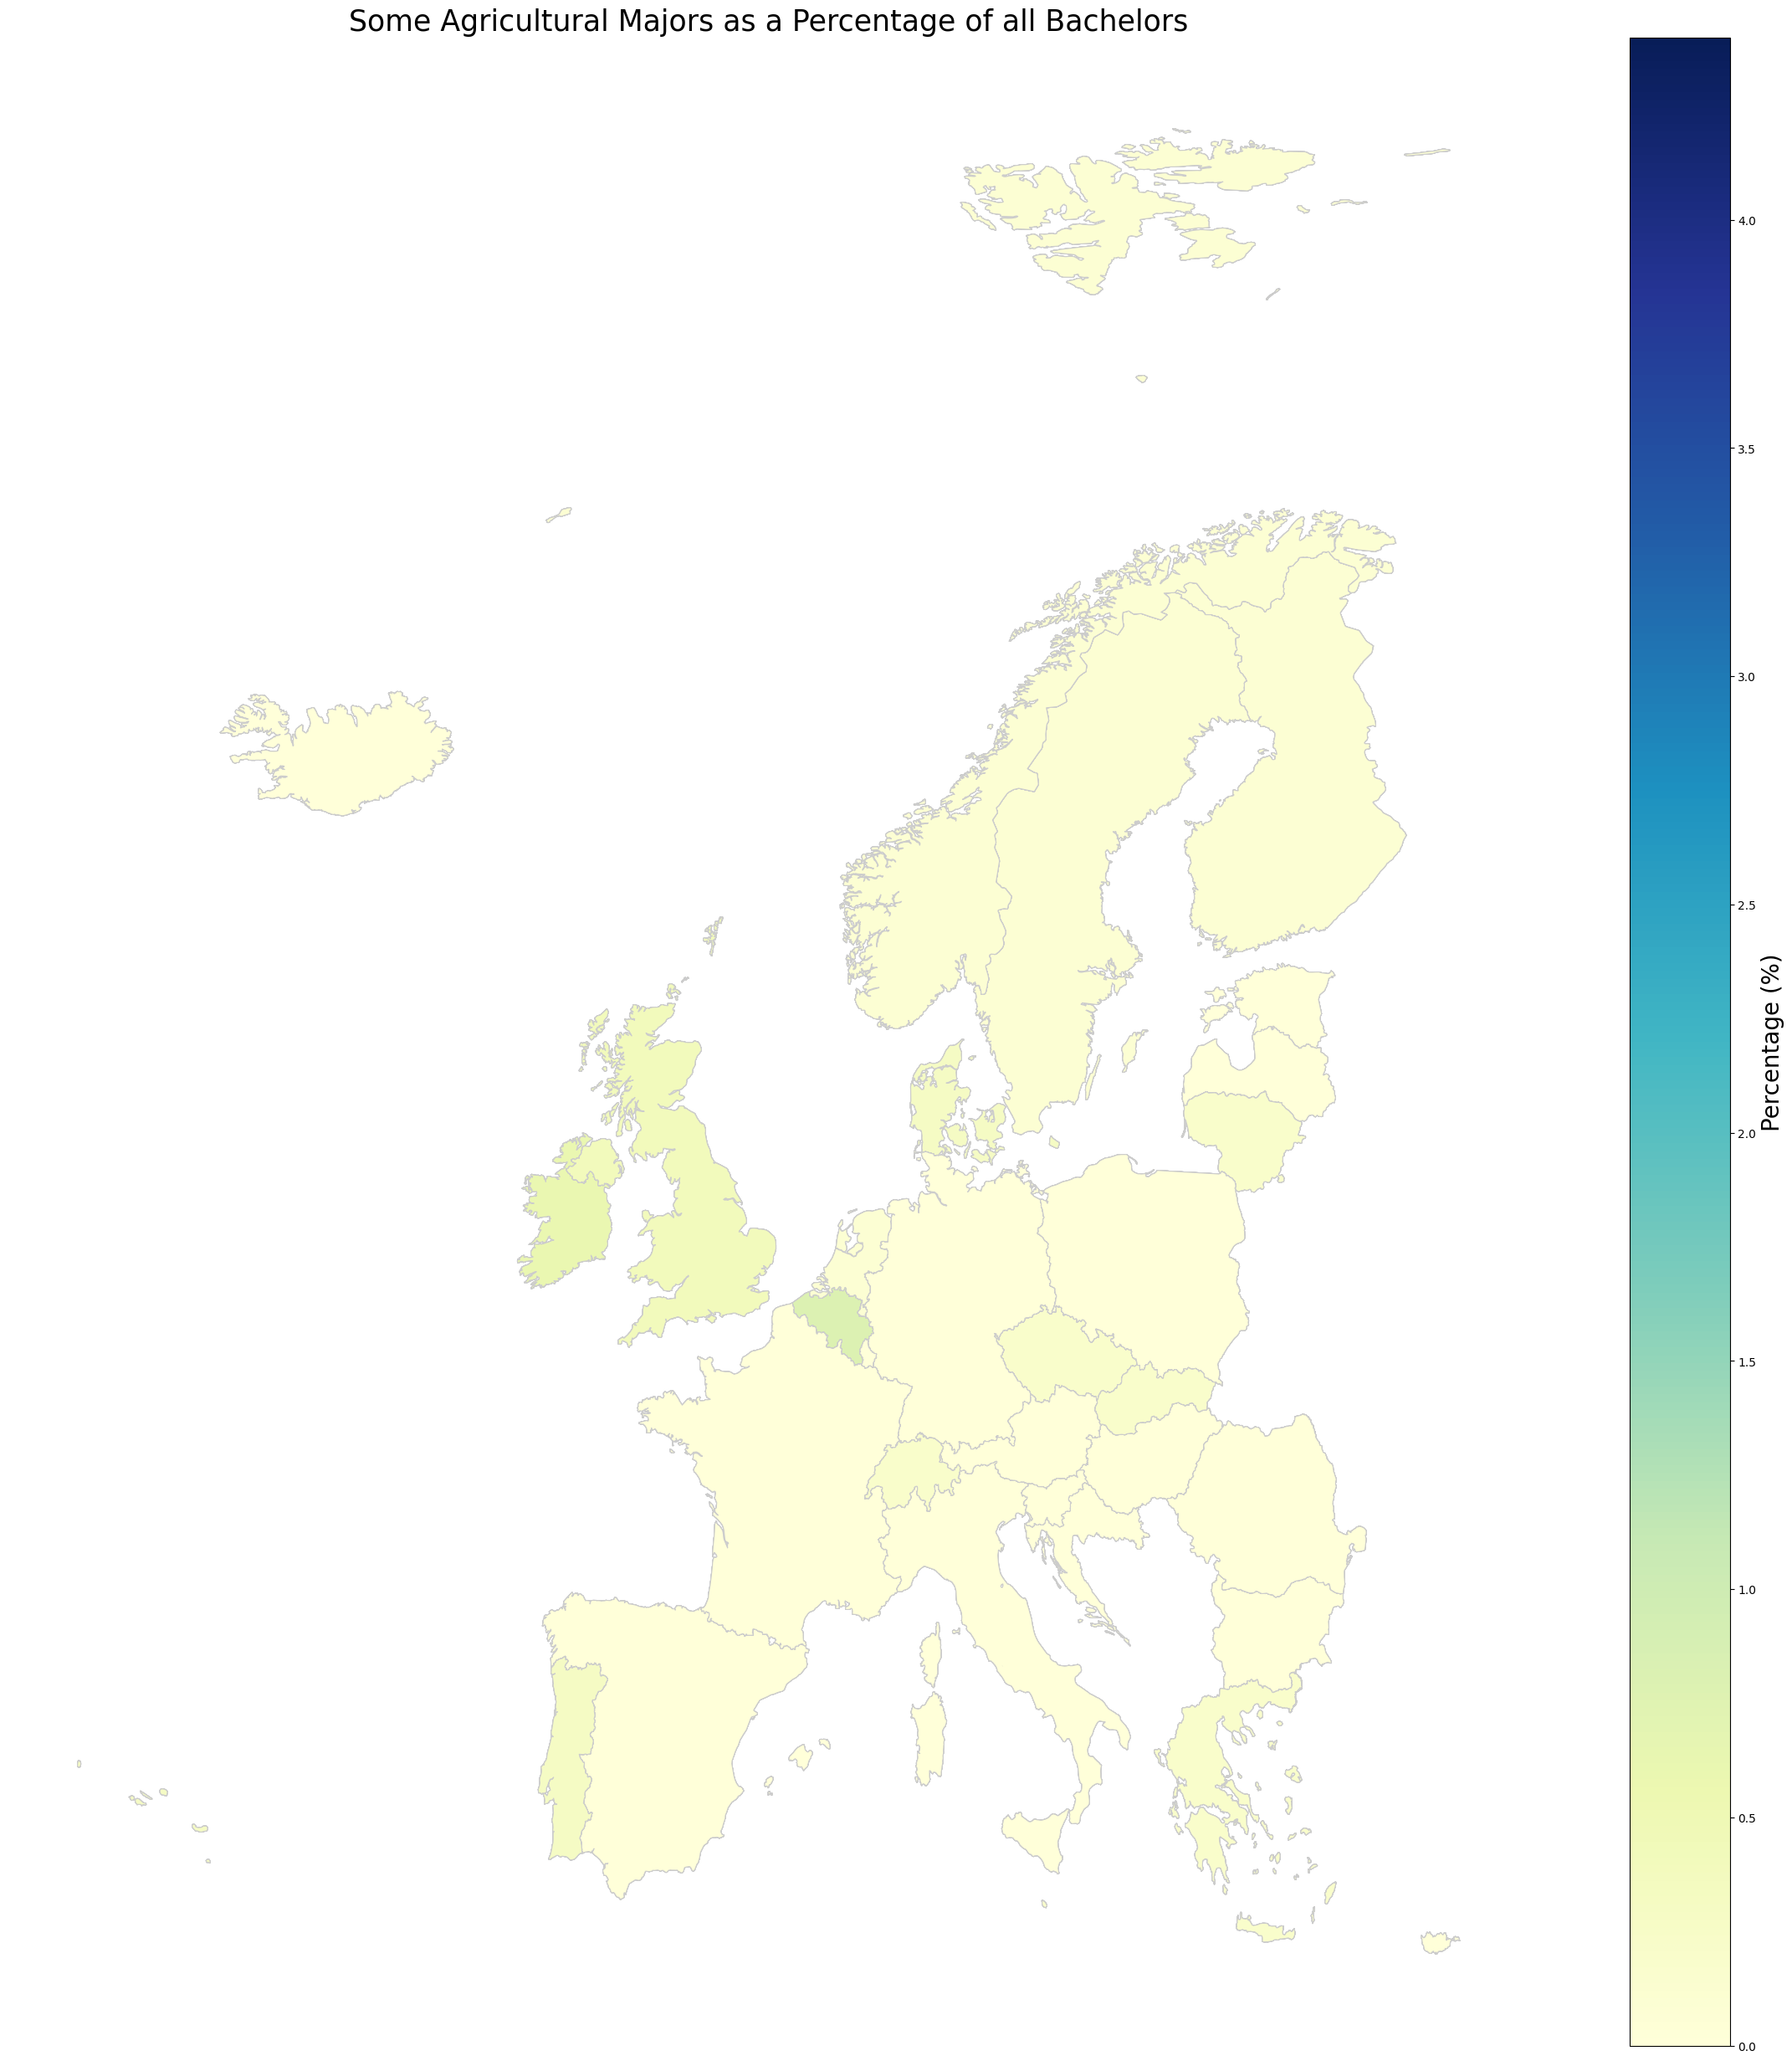

In [28]:
#Plotting Some Agricultural Majors as a Percentage of all Bachelors in 2018

# Filter the dataset for relevant categories and year
dataslice = dataedu_shp[
    (dataedu_shp['ISCEDF13_LABEL'].isin([
        'Veterinary', 'Agriculture, forestry, fisheries and veterinary',
        'Agriculture, forestry, fisheries and veterinary not further defined',
        'Agriculture', 'Agriculture not further defined',
        'Crop and livestock production', 'Horticulture',
        'Agriculture not elsewhere classified', 'Forestry', 'Fisheries'
    ])) & (dataedu_shp['TIME'] == 2018)
]

# Define colormap and normalization range
cmap = 'YlGnBu'
vmin, vmax = dataslice['Value'].min(), dataslice['Value'].max()

# Create figure and axes for the plot
fig, ax = plt.subplots(1, figsize=(30, 30))

# Remove axis
ax.axis('off')

# Add a title to the plot
ax.set_title('Some Agricultural Majors as a Percentage of all Bachelors',
             fontdict={'fontsize': 25, 'fontweight': 3})

# Plot the data
dataslice.plot(column='Value', cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []  # Empty array for the colorbar
cbar = fig.colorbar(sm, ax=ax)

# Add a label to the colorbar
cbar.set_label('Percentage (%)', fontsize=20)

# Adjust layout to ensure the title and colorbar are positioned properly
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# Show the plot
plt.show()

In [29]:
#let's find what major is studied the most per country
dataslice = dataedu_shp[(dataedu_shp['TIME']==2018) & (dataedu_shp.ISCEDF13_LABEL!="Total")]
dataslice.loc[dataslice["Value"] == None, 'Value'] =  0 #remove NaN values 
most_common_major_per_country = dataslice.loc[dataslice.groupby("GEO")["Value"].idxmax()]


In [30]:
dataslice[dataslice.GEO=="Estonia"].sort_values("Value", ascending=False)

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,TIME,GEO,UNIT,ISCED11,ISCEDF13,ISCEDF13_LABEL,SEX,SEX_LABEL,Value,Flag and Footnotes
40277,Admin-0 country,0.0,6.0,Estonia,EST,0.0,2.0,Sovereign country,Estonia,EST,...,2018,Estonia,Percentage,Bachelor's or equivalent level,F04,"Business, administration and law",T,Total,23.8,NaN
40279,Admin-0 country,0.0,6.0,Estonia,EST,0.0,2.0,Sovereign country,Estonia,EST,...,2018,Estonia,Percentage,Bachelor's or equivalent level,F041,Business and administration,T,Total,19.0,NaN
40324,Admin-0 country,0.0,6.0,Estonia,EST,0.0,2.0,Sovereign country,Estonia,EST,...,2018,Estonia,Percentage,Bachelor's or equivalent level,F07,"Engineering, manufacturing and construction",T,Total,14.8,NaN
40238,Admin-0 country,0.0,6.0,Estonia,EST,0.0,2.0,Sovereign country,Estonia,EST,...,2018,Estonia,Percentage,Bachelor's or equivalent level,F02,Arts and humanities,T,Total,14.6,NaN
40360,Admin-0 country,0.0,6.0,Estonia,EST,0.0,2.0,Sovereign country,Estonia,EST,...,2018,Estonia,Percentage,Bachelor's or equivalent level,F09,Health and welfare,T,Total,11.8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40295,Admin-0 country,0.0,6.0,Estonia,EST,0.0,2.0,Sovereign country,Estonia,EST,...,2018,Estonia,Percentage,Bachelor's or equivalent level,F0510,Biological and related sciences not further de...,T,Total,0.0,NaN
40293,Admin-0 country,0.0,6.0,Estonia,EST,0.0,2.0,Sovereign country,Estonia,EST,...,2018,Estonia,Percentage,Bachelor's or equivalent level,F050,"Natural sciences, mathematics and statistics n...",T,Total,0.0,NaN
40291,Admin-0 country,0.0,6.0,Estonia,EST,0.0,2.0,Sovereign country,Estonia,EST,...,2018,Estonia,Percentage,Bachelor's or equivalent level,F049,"Business, administration and law not elsewhere...",T,Total,0.0,NaN
40290,Admin-0 country,0.0,6.0,Estonia,EST,0.0,2.0,Sovereign country,Estonia,EST,...,2018,Estonia,Percentage,Bachelor's or equivalent level,F048,Inter-disciplinary programmes and qualificatio...,T,Total,0.0,NaN


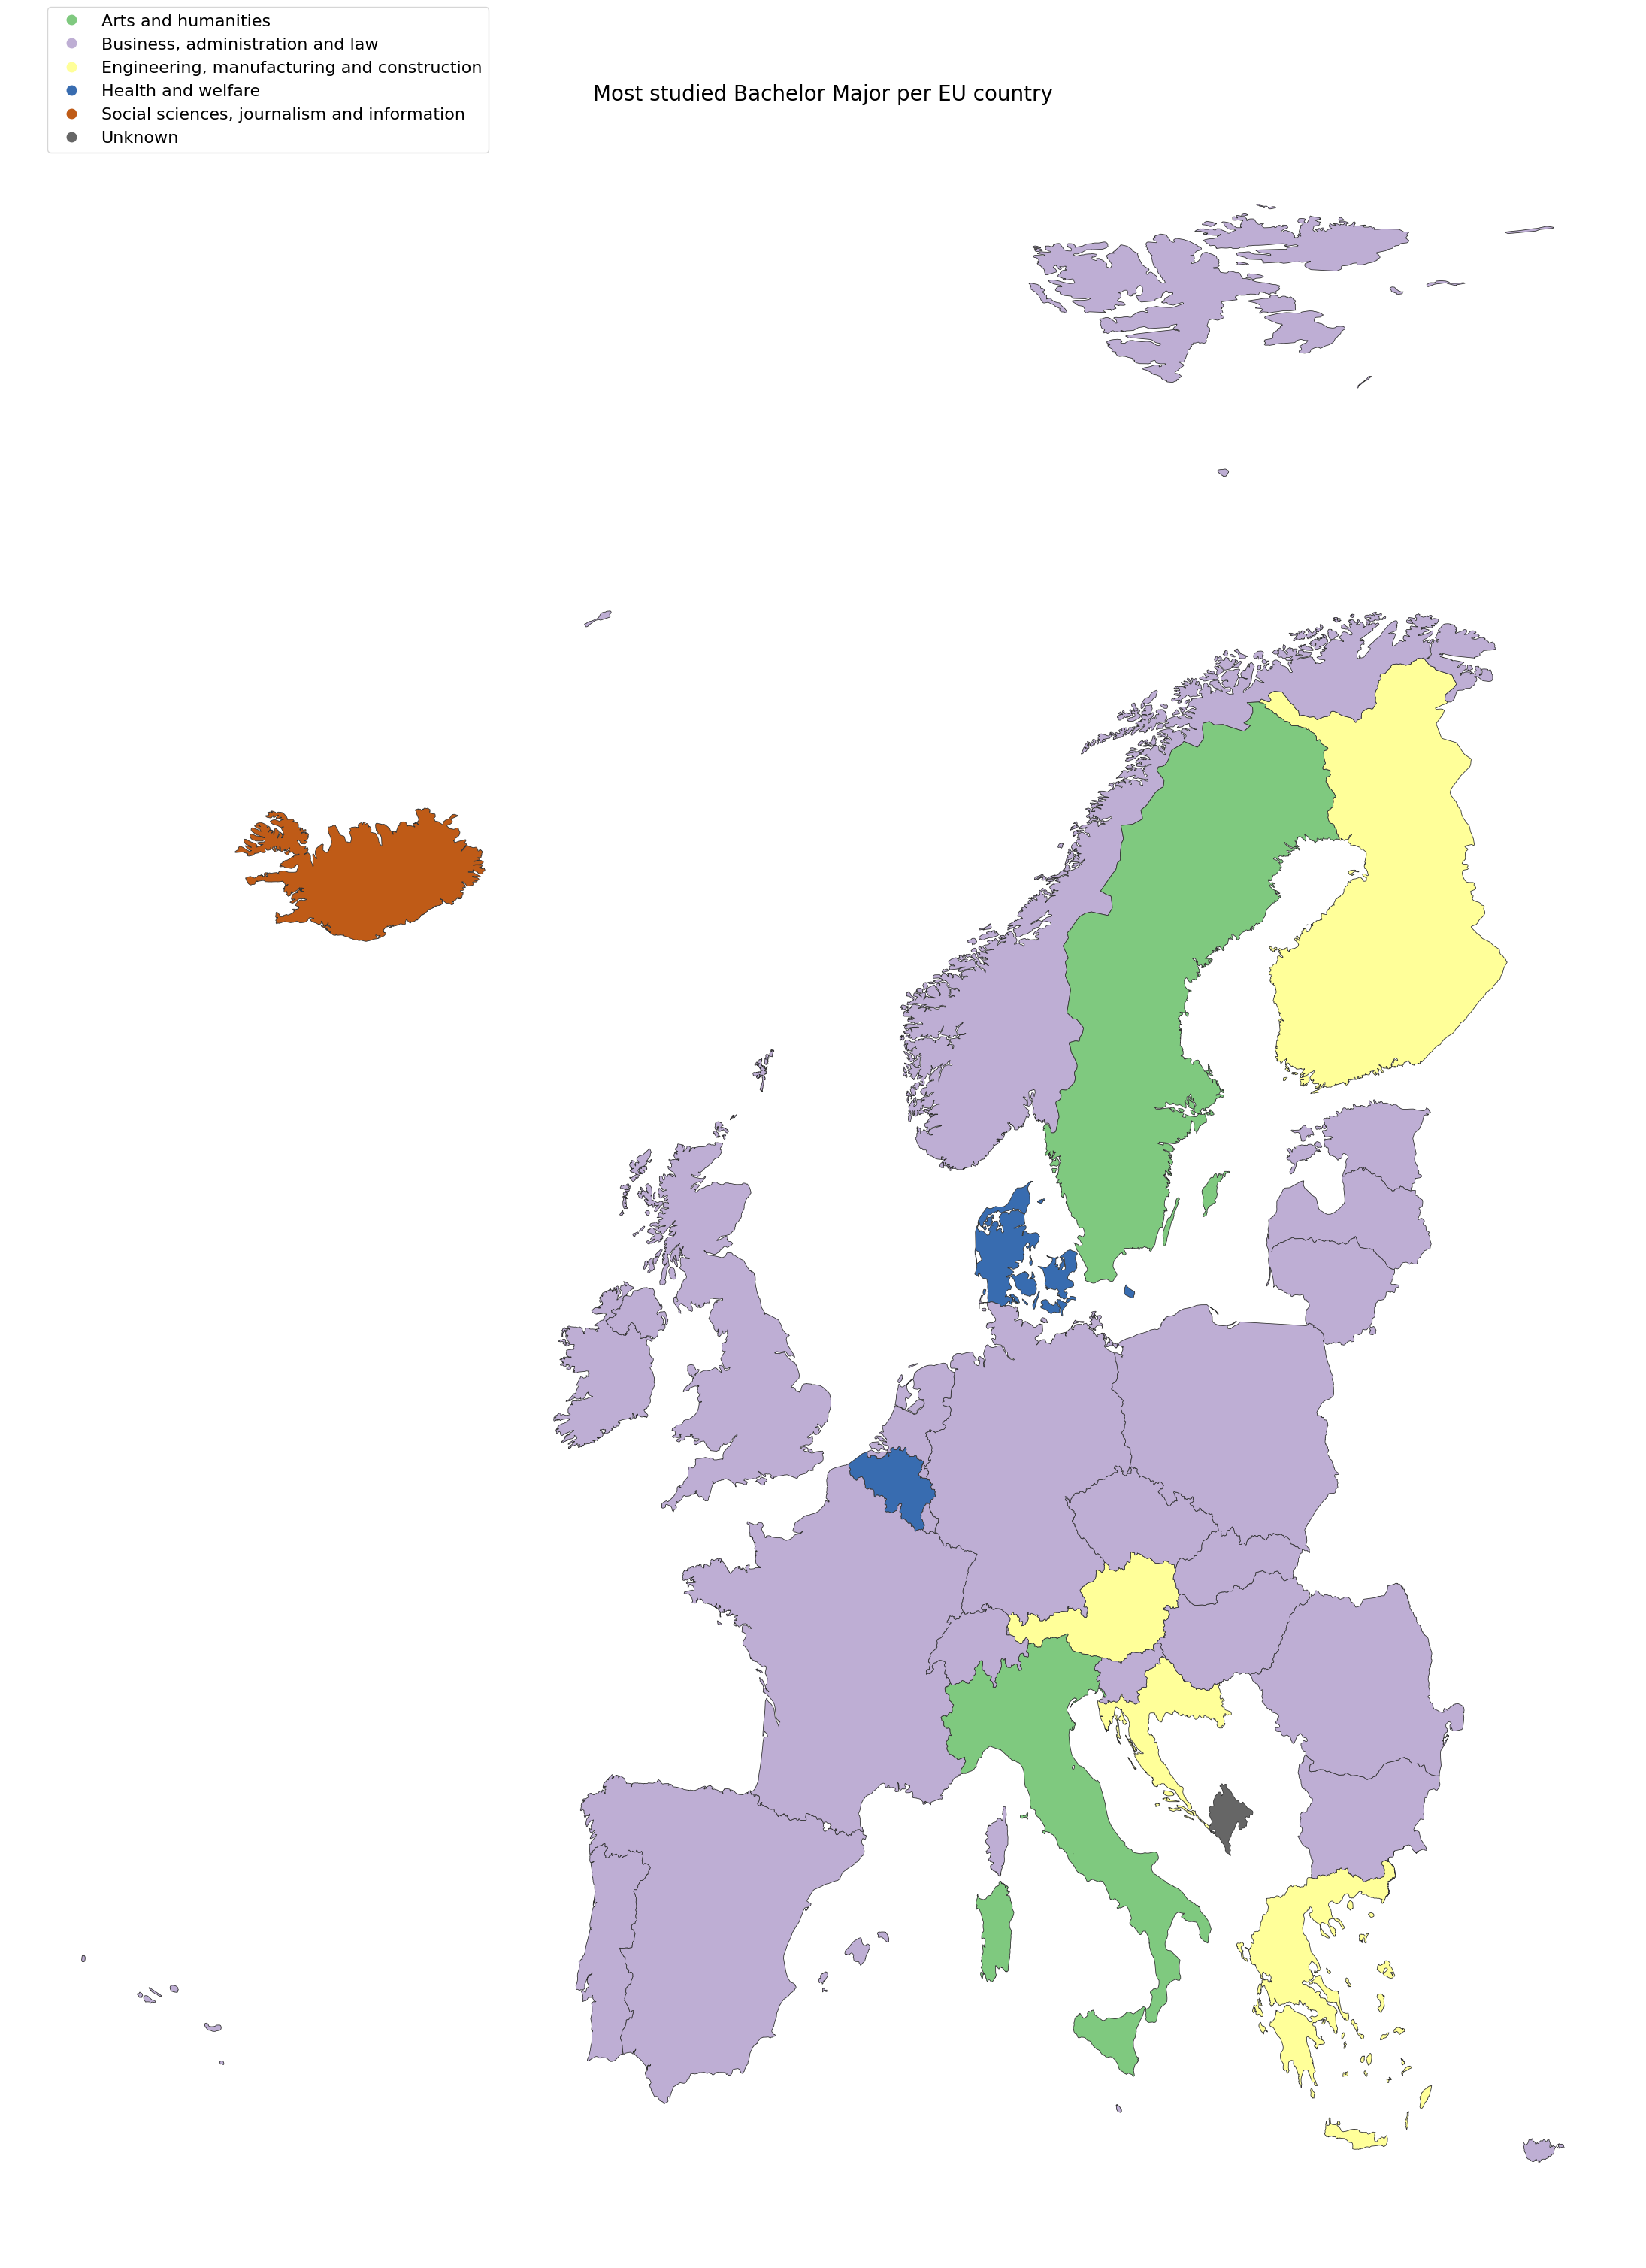

In [31]:
fig, ax = plt.subplots(1, figsize=(30,30))
most_common_major_per_country.plot(column='ISCEDF13_LABEL', categorical=True, cmap='Accent', linewidth=.6, edgecolor='0.2',
         legend=True, legend_kwds={'bbox_to_anchor':(.3, 1.05),'fontsize':16}, ax=ax)
ax.axis('off')
ax.set_title('Most studied Bachelor Major per EU country',fontsize=20)
plt.tight_layout()

## Different plots using geodatasets database

In [32]:
!pip install geodatasets

In [33]:
#list of datasets:

import geodatasets

geodatasets.data.flatten().keys()

dict_keys(['geoda.airbnb', 'geoda.atlanta', 'geoda.cars', 'geoda.charleston1', 'geoda.charleston2', 'geoda.chicago_health', 'geoda.chicago_commpop', 'geoda.chile_labor', 'geoda.cincinnati', 'geoda.cleveland', 'geoda.grid100', 'geoda.groceries', 'geoda.guerry', 'geoda.health', 'geoda.health_indicators', 'geoda.hickory1', 'geoda.hickory2', 'geoda.home_sales', 'geoda.houston', 'geoda.juvenile', 'geoda.lansing1', 'geoda.lansing2', 'geoda.lasrosas', 'geoda.liquor_stores', 'geoda.malaria', 'geoda.milwaukee1', 'geoda.milwaukee2', 'geoda.ncovr', 'geoda.natregimes', 'geoda.ndvi', 'geoda.nepal', 'geoda.nyc', 'geoda.nyc_earnings', 'geoda.nyc_education', 'geoda.nyc_neighborhoods', 'geoda.orlando1', 'geoda.orlando2', 'geoda.oz9799', 'geoda.phoenix_acs', 'geoda.police', 'geoda.sacramento1', 'geoda.sacramento2', 'geoda.savannah1', 'geoda.savannah2', 'geoda.seattle1', 'geoda.seattle2', 'geoda.sids', 'geoda.sids2', 'geoda.south', 'geoda.spirals', 'geoda.stlouis', 'geoda.tampa1', 'geoda.us_sdoh', 'ny.bb

<Axes: >

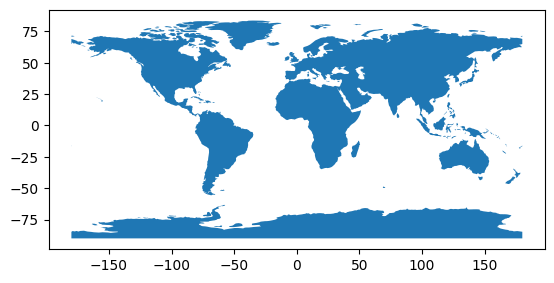

In [34]:
#example as world plot:
world = geodatasets.get_path('naturalearth.land')
gdf = gpd.read_file(world)
gdf.plot()